# Draft

In [ ]:
import pandas as pd
df = pd.read_csv('./globalterrorismdb.csv', low_memory=False, engine='c')

## Overview

What drives terrorism trends across the globe? The **Global Terrorism Database (GDT)** holds the answers, tracking over 200,000 incidents worldwide. The goal is to uncover patterns in hotspots, tactics, and casualties over time. By analyzing the GTD, we gain insights into trends such as the methods, regions, and targets involved in terrorism, as well as the political, economic, and social contexts that drive these violent acts.

In this project, we leverage the GTD to explore the geographical hotspots of terrorism, uncover trends over time, and analyze the effectiveness and tactics of terrorist groups.

The insights from this data can serve as a foundation for policymakers, security agencies, and researchers aiming to mitigate terrorism’s impact. By focusing on trends over time, geographical distribution, and methods of attack, we aim to provide a comprehensive view of the state of terrorism worldwide, offering a clear perspective on both historical and emerging trends.

## Preprocessing Phase
After selecting the necessary columns for analysis, the next steps in the data cleaning process involve addressing missing values, handling incorrect or inconsistent data, and preparing the data for analysis. Here’s a breakdown of the key steps I took:

One of the first things I had to tackle was dealing with missing or null values. This is common in large datasets, especially one like the Global Terrorism Database (GTD), where certain data points might be missing due to incomplete reports or the limitations of data collection in conflict zones. Missing values can lead to biased or inaccurate analysis, so it’s important to handle them carefully.

In the case of this project, where we are exploring terrorism hotspots, trends over time, and methods of attack, the missing data could significantly impact our insights if not addressed properly.

To streamline the dataset and focus on the project's goals, I narrowed it down to only the columns essential for analyzing trends, hotspots, and attack characteristics. These included fields for date, location, attack type, targets, and impact, such as `iyear`, `country_txt`, `attacktype1_txt`, `nkill`, and `gname`. By selecting just these columns, I ensured the dataset remained manageable and directly relevant to uncovering insights about terrorism.

In [ ]:
needed_columns = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude',
    'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1', 'natlty1_txt',
    'gname', 'nkill', 'nwound', 'suicide', 'success'
]
df = df[needed_columns]

From the output below, we can see that some columns have null values while 11 columns no null values.

- Since `latitude` and `longitude` are essential for location-based analysis, I removed rows with missing values in these fields.

- I addressed missing data by filling numerical fields like `nkill` and `nwound` with `0` and categorical fields such as `targsubtype1_txt` and `natlty1_txt` with `Unknown`. This ensured data consistency while preserving critical rows.

 To clean up duplicates, I removed redundant rows using `df.drop_duplicates(inplace=True)`. Lastly, I standardized columns like `attacktype1_txt` by converting all text to lowercase and stripping extra spaces to ensure consistency across categories. Here's the code I used for these steps:

In [ ]:
# this gets the number of null values for each attribute(column)
df.isnull().sum()

,0
iyear,0
imonth,0
iday,0
country_txt,0
region_txt,0
latitude,4691
longitude,4692
attacktype1_txt,0
weaptype1_txt,0
targtype1_txt,0


In [ ]:
# Code to clean up the duplicates and standardize columns
df = df.dropna(subset=['latitude', 'longitude'])

df.loc[:, 'nkill'] = df['nkill'].fillna(0)
df.loc[:, 'nwound'] = df['nwound'].fillna(0)
df.loc[:, 'targsubtype1_txt'] = df['targsubtype1_txt'].fillna('Unknown')
df.loc[:, 'natlty1_txt'] = df['natlty1_txt'].fillna('Unknown')

df = df.drop_duplicates()

df.loc[:, 'attacktype1_txt'] = df['attacktype1_txt'].str.lower().str.strip()


After preprocessing the structure of our database looks like this:

In [ ]:
row, column = df.shape
print(f"Number of rows: {row}")
print(f"Number of columns: {column}")

Number of rows: 194383
Number of columns: 18


With that, we have `3498894` cells.



---


## Analysis and Insight

#### Trend over the years

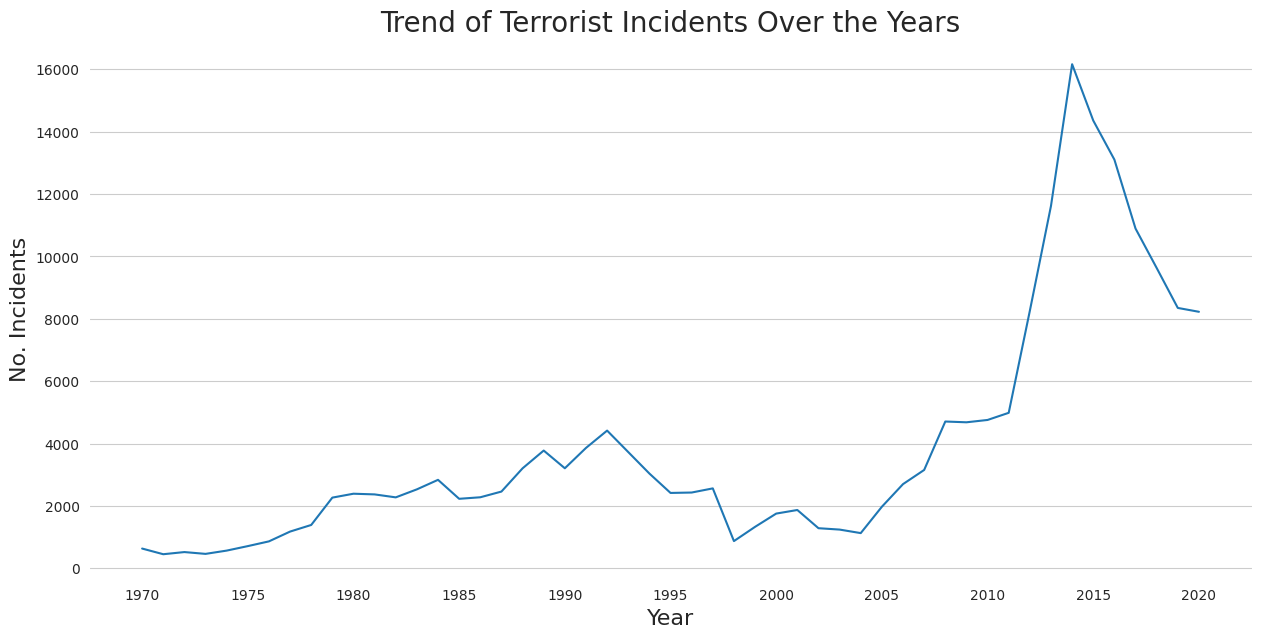

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

yearly_trends = df.groupby('iyear').size().reset_index(name='incidents')
custom = {
    "axes.edgecolor": "white",
    "grid.linestyle": "solid",
}
sns.set_style('whitegrid', rc=custom)
plt.figure(figsize=(15, 7))
sns.lineplot(data=yearly_trends, x='iyear', y='incidents')
plt.xticks(ticks=range(yearly_trends['iyear'].min(), yearly_trends['iyear'].max() + 1, 5))
plt.title('Trend of Terrorist Incidents Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('No. Incidents', fontsize=16)
plt.grid(axis='x')

#### **Observed Trends**:
Rise and Decline in Terrorist Activity Over Time:
- The first chart shows a relatively stable trend in global terrorist incidents from 1970 to the mid-2000s, followed by a dramatic spike between 2010 and 2014. The peak appears to occur around 2014, after which there is a noticeable decline.
- The sharp increase from 2010 to 2014 could be attributed to the rise of extremist groups such as ISIS, whose influence significantly grew during this period (Laub, 2017). The subsequent decline might reflect military actions and global counter-terrorism efforts targeting such groups.

Periods of Significant Changes:
- 1980s–1990s: Moderate increases in activity during this time could be linked to geopolitical instability, such as the Iran-Iraq war and the rise of insurgent groups during the Cold War era.
- Post-2000: The slight dip in the early 2000s is followed by gradual increases, coinciding with the impact of the "War on Terror" post-9/11.
- 2014 Peak: The sharp peak around 2014 aligns with global concerns about ISIS’s territorial gains and influence in Iraq and Syria (Byman, 2016).

#### Regional Comparison

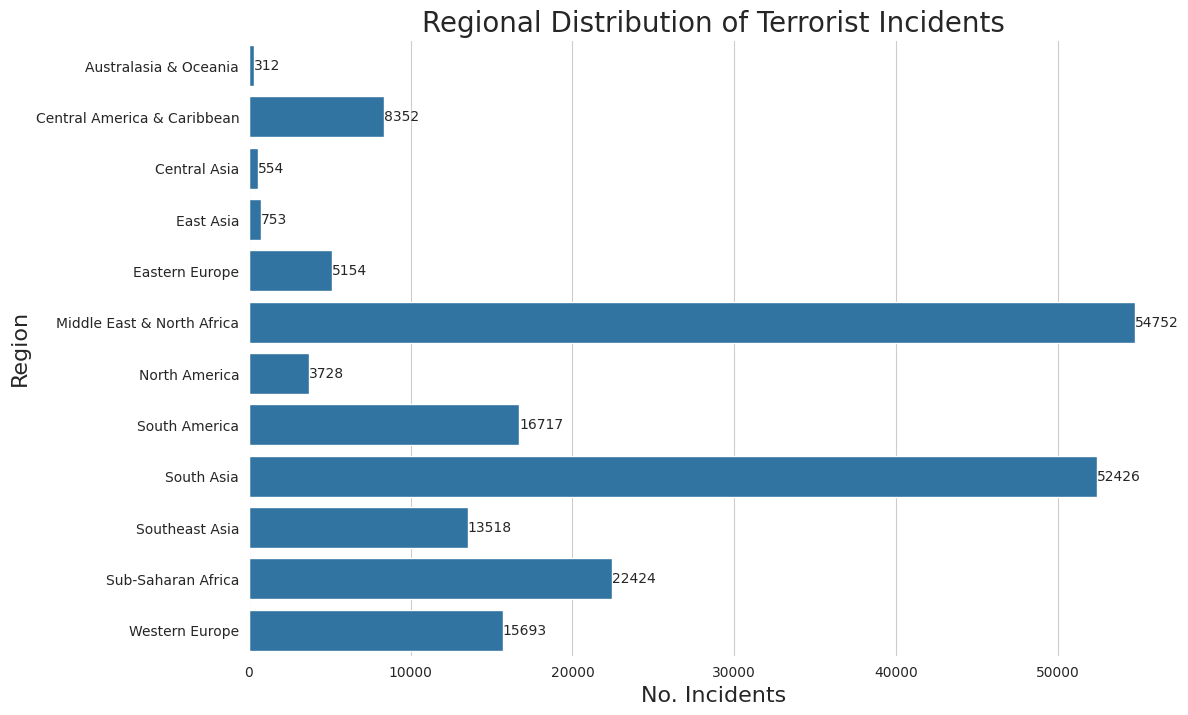

In [ ]:
regional_trends = df.groupby('region_txt').size().reset_index(name='incidents')
sns.set_color_codes("muted")
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=regional_trends, x='incidents', y='region_txt')
ax.bar_label(ax.containers[0])
plt.title('Regional Distribution of Terrorist Incidents', fontsize=20)
plt.xlabel('No. Incidents', fontsize=16)
plt.ylabel('Region', fontsize=16)
plt.show()

#### **Regional Differences**:

Volatile Regions:
- The Middle East & North Africa (MENA) and South Asia have significantly higher numbers of incidents. MENA’s instability can be tied to prolonged conflicts (e.g., the Syrian Civil War) and insurgencies. Similarly, South Asia’s high incidents are associated with ongoing tensions in regions such as Afghanistan and Pakistan (START, 2019).

Stable Regions:
- Regions like Australasia & Oceania and East Asia have relatively low incident counts, suggesting greater political stability and less susceptibility to global terrorist trends during the analyzed period.

Emerging Patterns:
- Sub-Saharan Africa's high number of incidents highlights the increasing activity of groups such as Boko Haram and Al-Shabaab, particularly in the 2010s.



#### Common Attack Methods

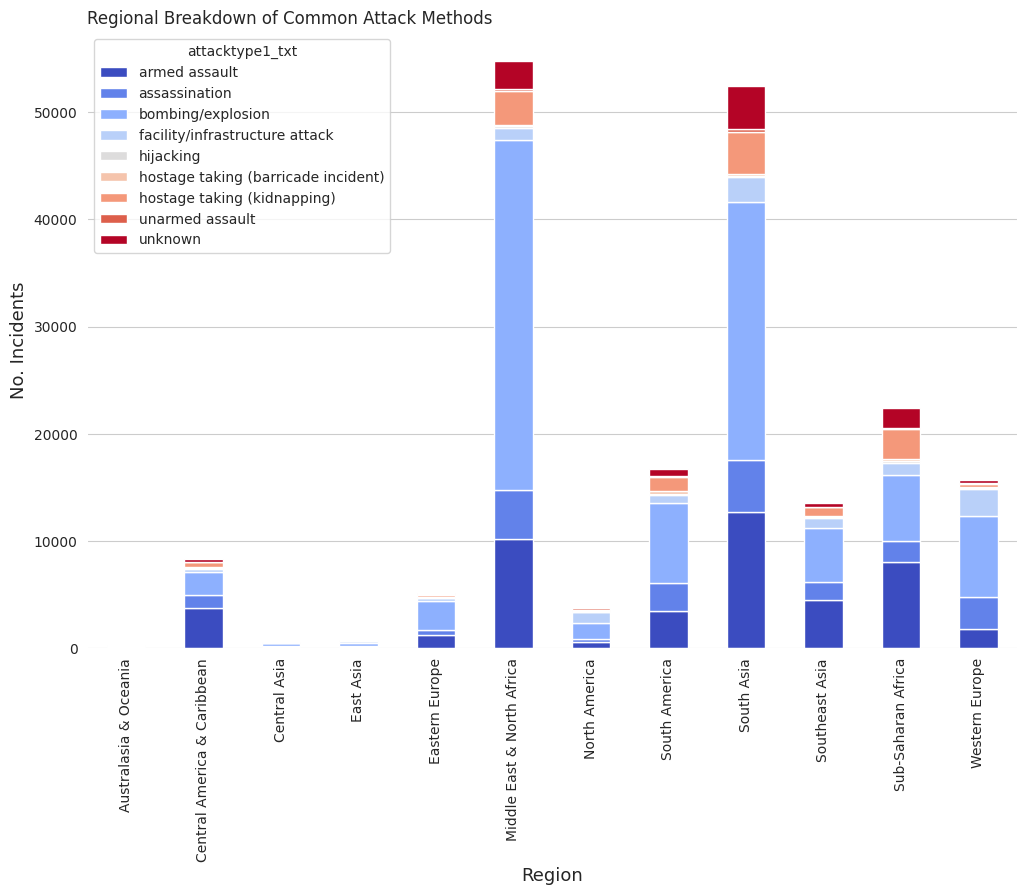

In [ ]:
attack_type_data = df.groupby(['region_txt', 'attacktype1_txt']).size().unstack()
attack_type_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Regional Breakdown of Common Attack Methods', loc='left')
plt.xlabel('Region', fontsize=13)
plt.ylabel('No. Incidents', fontsize=13)
plt.grid(axis='x')
plt.show()

1. Dominance of Bombing/Explosion Methods
  - Bombings are the most common attack method globally, especially in Middle East & North Africa (MENA) and South Asia, due to prolonged conflicts and insurgencies. These regions' instability and the tactics of groups like ISIS and the Taliban drive this trend.

2. Regional Differences in Attack Methods
  - Sub-Saharan Africa shows a high prevalence of armed assaults and kidnappings, reflecting the strategies of groups like Boko Haram, which rely on direct attacks and ransom tactics. In contrast, Western Europe and North America exhibit more balanced use of various methods, often tied to lone-wolf or small-cell operations.

3. Relatively Stable Regions
  - Regions such as Australasia & Oceania and Central Asia have minimal incidents, suggesting geopolitical stability compared to conflict-prone areas.

4. Impact of Security Measures
  - The low occurrence of hijackings highlights the effectiveness of modern global security protocols in reducing these attacks.

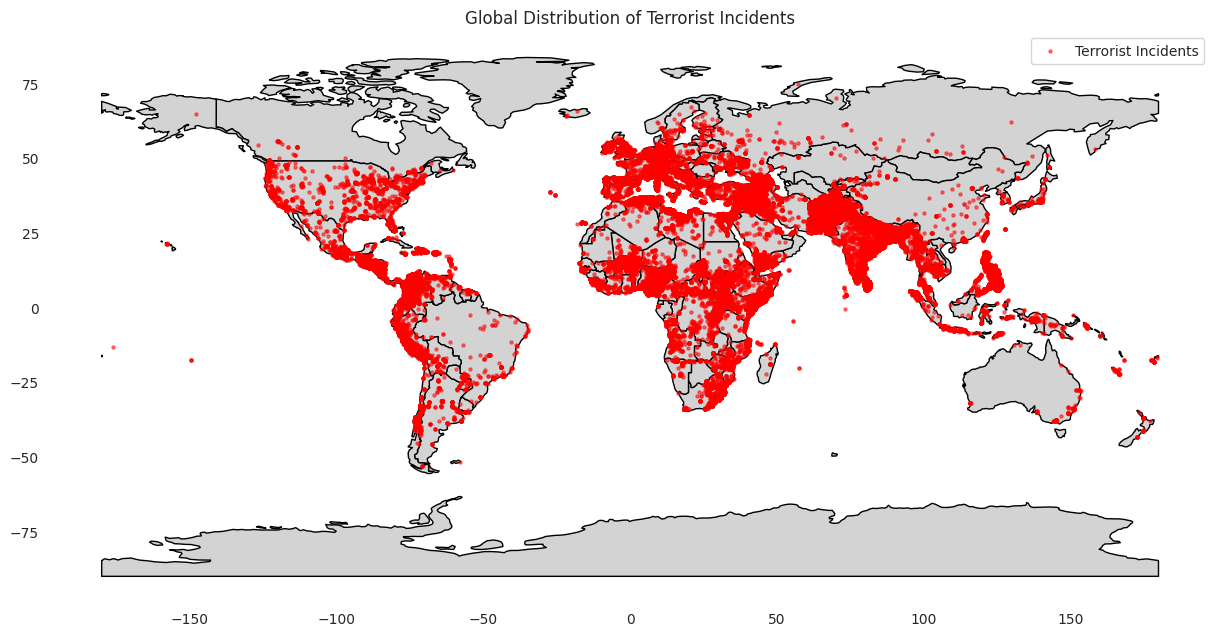

In [ ]:
import geopandas as gpd
world = gpd.read_file("./ne_110m_admin_0_countries.shp")
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
    crs="EPSG:4326"
)
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5, label='Terrorist Incidents')
ax.grid(False)
plt.legend()
plt.title('Global Distribution of Terrorist Incidents')
plt.show()

#### **Hotspot Activity**
As shown above and discussed in previous insights certain regions experience a striking density in terrorist incidents.
  - **Middle East and South Asia**: These regions are heavily impacted, with countries like Iraq, Afghanistan, and Pakistan showing a high frequency of attacks. This aligns with ongoing conflicts, political instability, and the presence of extremist groups.
  - **Sub-Saharan Africa**: Interestingly, while MENA and South Asia lead in incidents due to insurgencies and conflicts, Sub-Saharan Africa is catching up, driven by groups like Boko Haram.

#### **Urban Centers and Border Areas Under Threat**

It’s clear that terrorists often target urban hubs because of their dense populations and critical infrastructure. Additionally, increased activity along some borders (e.g., Afghanistan-Pakistan, Nigeria’s northern borders) suggests cross-border insurgencies and smuggling routes play a role in fueling violence.


#### **Relatively Safer Regions**

Developed countries, including much of North America and Western Europe, show relatively sparse activity. While terrorist incidents have occurred in these regions, stringent counterterrorism measures and political stability have likely mitigated large-scale impacts.


#### **Emerging Patterns**

- **Latin America**: Countries like Colombia and Mexico show clusters of activity that could be attributed to narco-terrorism and local insurgencies.
- **Southeast Asia**: Rising pockets of violence in regions such as the Philippines and Thailand may stem from separatist movements and localized extremism.

#### Correlation between incidents and casualties


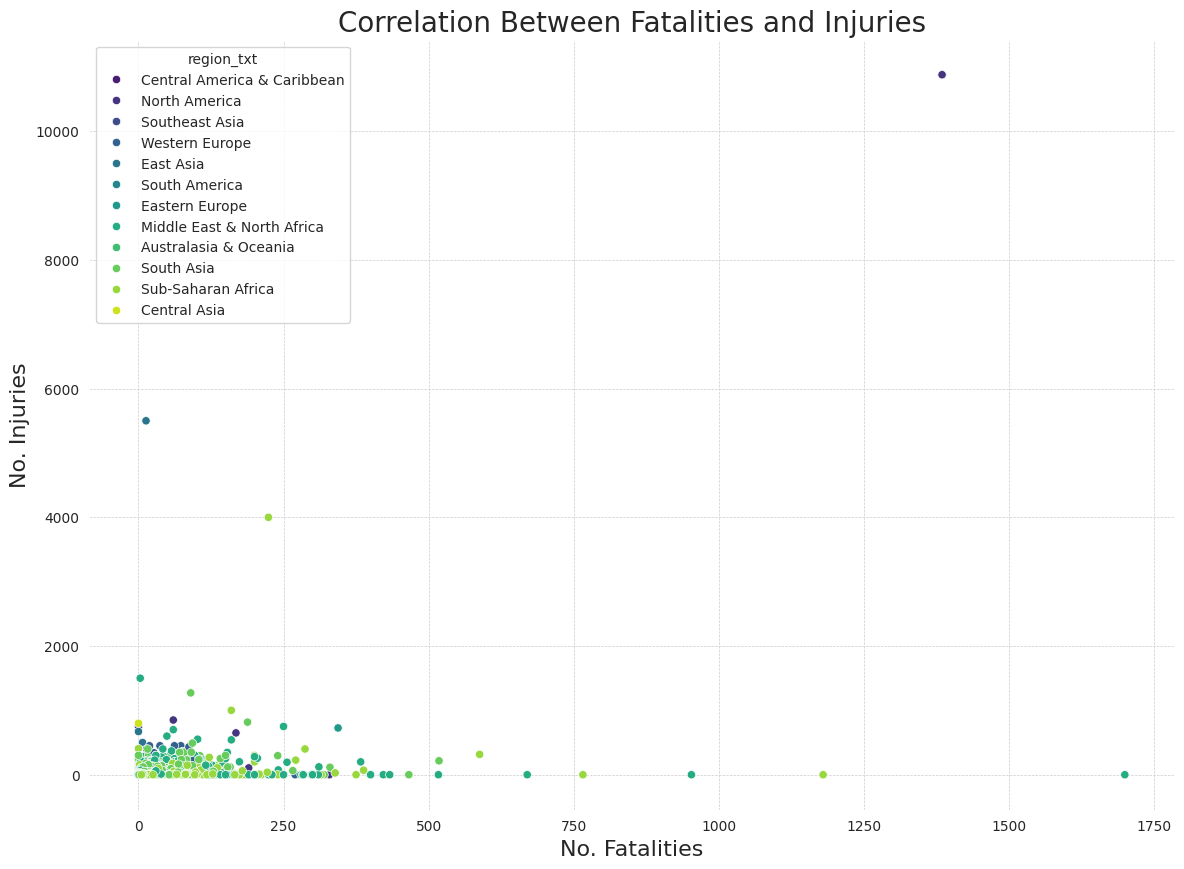

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='nkill', y='nwound', hue='region_txt', palette='viridis')
plt.title('Correlation Between Fatalities and Injuries', fontsize=20)
plt.xlabel('No. Fatalities', fontsize=16)
plt.ylabel('No. Injuries', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
correlation = df['nkill'].corr(df['nwound'])
print(f"Correlation: {correlation}")

Correlation: 0.4413017896218516


#### Key Insights about the correlation
1. **Moderate Positive Correlation (0.44)**

  - What stood out to me was the moderate correlation—incidents with more fatalities often caused more injuries, though the relationship wasn’t always linear. This reflects the variability of terrorist tactics. Some attacks may aim to maximize injuries (e.g., explosions in crowded areas), while others target fatalities more directly.
  
2. **High-Impact Outliers**

  - Specific regions like North America and South Asia show extreme outliers, with incidents that caused thousands of injuries (e.g., bombings targeting densely populated areas or public transportation hubs). For example, the 9/11 attacks are a prime example of disproportionate injuries compared to fatalities (Pape, 2003).

3. **Regional Differences**

  - Middle East & North Africa and Sub-Saharan Africa display clusters with higher fatalities, likely tied to armed conflicts and insurgent operations aimed at mass casualties.
  - Western Europe and North America incidents tend to have fewer fatalities but higher injuries, often due to urban density and advanced medical response systems.

4. **Public Health and Emergency Preparedness**

    - Regions with robust emergency response systems might report lower fatalities but higher injuries because lives are saved despite the severity of attacks (World Health Organization, 2019)




---


## Summary
The Global Terrorism Database reveals clear patterns in terrorist activity over time and across regions. A spike in incidents from 2010 to 2014, driven by groups like ISIS, highlights the geopolitical instability of the period, with a decline following intensified counterterrorism efforts. Regions such as the Middle East, South Asia, and Sub-Saharan Africa emerge as hotspots, while North America and Western Europe experience fewer incidents, thanks to robust security measures.

Bombings dominate attack methods globally, especially in conflict-prone areas, while kidnappings and armed assaults are prevalent in regions like Sub-Saharan Africa. Urban centers are frequent targets due to their dense populations, with cross-border regions also at risk due to insurgent activity.

The moderate correlation between fatalities and injuries emphasizes variability in attack severity. Developed regions often report higher injuries but fewer fatalities, reflecting stronger emergency response systems.

These insights highlight the need for targeted interventions in hotspots like urban centers and border areas. Policymakers can focus resources on regions like the Middle East and Sub-Saharan Africa, while researchers can explore ***how socioeconomic factors drive these trends***.

---

> It’s important to note that the data displayed may reflect reporting limitations. Rural regions and conflict zones with restricted media access, particularly in Africa and parts of Southeast Asia, might underreport incidents.






---


## References:
- Byman, D. (2016). Understanding the Islamic State: A review essay. *International Security*, 40(4), 127-165.  
  Retrieved from [MIT Press](https://www.mitpressjournals.org/doi/full/10.1162/ISEC_a_00234)

- Institute for Economics and Peace. (2020). *Global Terrorism Index 2020: Measuring the impact of terrorism.*  
  Retrieved from [Institute for Economics and Peace](https://www.economicsandpeace.org/reports)

- Laub, Z. (2017). The Islamic State. *Council on Foreign Relations*.  
  Retrieved from [CFR](https://www.cfr.org/backgrounder/islamic-state)

- START. (2019). *Global Terrorism Database Codebook: Methodology*.  
  Retrieved from [START UMD](https://www.start.umd.edu/gtd)

- World Health Organization. (2019). Emergency response to terrorist attacks: Guidelines. Retrieved from https://www.who.int.

- Pape, R. A. (2003). The strategic logic of suicide terrorism. American Political Science Review, 97(3), 343-361.

